7214
6536


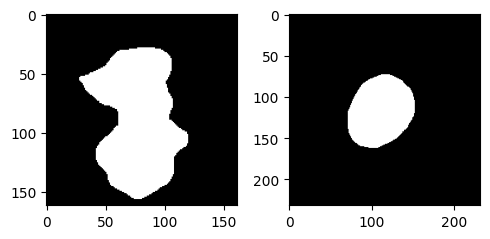

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
from prep_image import prep_im_and_gt
from math import pi

im, gt = prep_im_and_gt("PAT_1074_322_662", "test_images/", "test_image_groundtruths/", scalar=.25)
im1, gt1 = prep_im_and_gt("PAT_107_160_609", "test_images/", "test_image_groundtruths/", scalar=.25)
#plt.imshow(gt, cmap="gray")

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(gt, cmap='gray')
axes[1].imshow(gt1, cmap='gray')
fig.tight_layout()

In [40]:
def compactness_score(gt):
    
    #Area of ground truth 
    A = np.sum(gt)

    #Structural element, that we will use as a "brush" on our mask
    struct_el = morphology.disk(2)

    # Use this "brush" to erode the image - eat away at the borders
    mask_eroded = morphology.binary_erosion(gt, struct_el)

    #Finding the perimeter of the ground truth
    perimeter_gt = gt - mask_eroded

    #Length of the perimeter
    l = np.sum(perimeter_gt)

    compactness = (l**2)/(4*pi*A)

    return compactness

score_1 = compactness_score(gt)
score_2 =compactness_score(gt1)

print(score_1, score_2)




5.070763852249433 3.2704311507385144


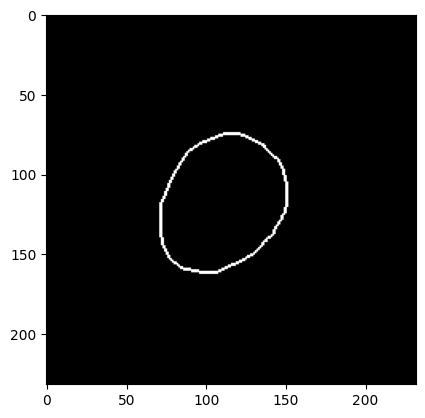

In [41]:
def show_border(gt):
    #Area of ground truth 
    A = np.sum(gt)

    #Structural element, that we will use as a "brush" on our mask
    struct_el = morphology.disk(2)

    # Use this "brush" to erode the image - eat away at the borders
    mask_eroded = morphology.binary_erosion(gt, struct_el)

    #Finding the perimeter of the ground truth
    perimeter_gt = gt - mask_eroded

    return plt.imshow(perimeter_gt, cmap='gray')

show_border(gt1)